# Import the Libraries

In [10]:
import numpy as np
import pandas as pd

# Import the Dataset

In [11]:
df=pd.read_csv("Position_Salaries.csv")
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [12]:
df.count()

Position    10
Level       10
Salary      10
dtype: int64

# Visualizing the dataset

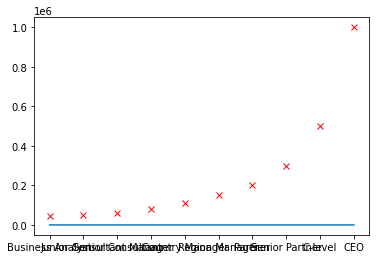

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df.Position, df.Level,df.Salary ,"rx")

# Label Encoding

In [14]:
#position is the categorical variable of ordinal type

df['Position'].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [15]:
from sklearn import preprocessing

label_encoder= preprocessing.LabelEncoder()
df['Position']= label_encoder.fit_transform(df['Position'])
df

,Position,Level,Salary
0,0,1,45000
1,4,2,50000
2,8,3,60000
3,5,4,80000
4,3,5,110000
5,7,6,150000
6,6,7,200000
7,9,8,300000
8,1,9,500000
9,2,10,1000000


In [16]:
df.count()

Position    10
Level       10
Salary      10
dtype: int64

# Train test split

In [17]:
from sklearn.model_selection import train_test_split

x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [18]:
# print(x.size)
# print(y.size)
# print(x.shape,x_train.shape,x_test.shape)
# print(y.shape,y_train.shape,y_test.shape)

# Fitting a Decision-Tree algorithm to the Training set

In [20]:
#decision tree regressor because labels are descrete
from sklearn import tree

model1= tree.DecisionTreeRegressor(criterion='squared_error',random_state=4)
model1.fit(x,y)
#model1.score(x_test,y)

DecisionTreeRegressor(random_state=4)

# Predicting the test result

In [24]:
y_pred=model1.predict([[7.1]])
print(y_pred)
#print(y_test)

[200000.]


# Comparing the test set with predicted values

In [ ]:
data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
data

#We can see that the predicted salaries are very close to the real salary values and it 
#can be concluded that the model has been well trained.

# Visualizing in a tree structure

[Text(0.703125, 0.9285714285714286, 'X[0] <= 8.5\nsquared_error = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(0.53125, 0.7857142857142857, 'X[0] <= 6.5\nsquared_error = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(0.375, 0.6428571428571429, 'X[0] <= 4.5\nsquared_error = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(0.25, 0.5, 'X[0] <= 3.5\nsquared_error = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(0.1875, 0.35714285714285715, 'X[0] <= 2.5\nsquared_error = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(0.125, 0.21428571428571427, 'X[0] <= 1.5\nsquared_error = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(0.0625, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(0.1875, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(0.25, 0.21428571428571427, 'squared_error = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(0.3125, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 80000.0')

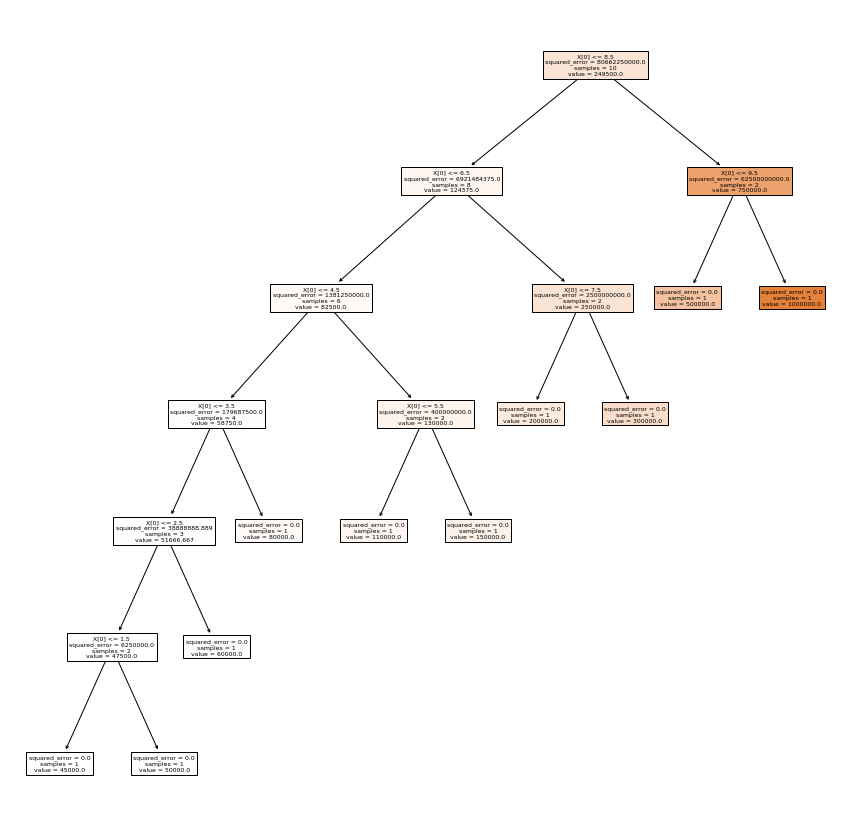

In [22]:
from sklearn import tree

plt.figure(figsize=(15,15))
tree.plot_tree(model1, filled=True)

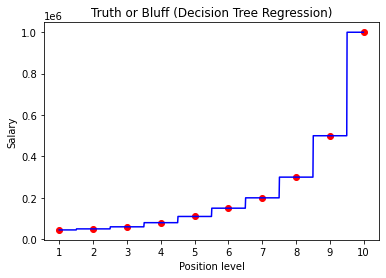

In [27]:
X_grid = np.arange(min(x), max(x), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, model1.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()